# Analysis of Seattle Collision Data
#### Capstone Project For IBM's Data Science Professional Certificate On Coursera
#### Prepared by Miranda Childs on August 24th, 2020

## Table of contents
* [Introduction and Business Understanding](#introduction)
* [Data Understanding and Preparation](#data)
* [Methodology](#method)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction and Business Understanding<a name="introduction"></a>

In Seattle, from 2004 to present there have been 194,673 collisions reported by the Seattle Police Department to the Seattle Department of Transportation (SDOT). 58,188 of those collisions resulted in an injury.We aim to reduce the number of accidents, especially those with injuries, in order to increase the wellbeing and longevity of our community. We will prepare a presentation for SDOT and the Vision Zero Network, "a collaborative campaign helping communities reach their goals of Vision Zero -- eliminating all traffic fatalities and severe injuries -- while increasing safe, healthy, equitable mobility for all." (<a href="https://visionzeronetwork.org">Vision Zero Network</a>)


## Data Understanding and Preparation<a name="data"></a>

We will be using the shared data set on collisions from 2004 to present, provided by the Traffic Records Group in conjunction with the Seattle Police Department and Seattle Department of Transportation. (Here are links to <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv">the dataset</a> and <a href="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf">corresponding metadata</a>.)


In [63]:
#Import pandas and numpy
import pandas as pd
import numpy as np

In [64]:
#Import the dataset
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False);
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [65]:
#We can look at a list of the columns in the dataset
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [46]:
#And review information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [66]:
#As the collision's severity will serve as our independent variable, it is important to understand this attribute.
#It appears there are three different columns, relating to severity so let's review them.
df_severity= df[['SEVERITYCODE','SEVERITYCODE.1', 'SEVERITYDESC' ]]
df_severity.head()

,SEVERITYCODE,SEVERITYCODE.1,SEVERITYDESC
0,2,2,Injury Collision
1,1,1,Property Damage Only Collision
2,1,1,Property Damage Only Collision
3,1,1,Property Damage Only Collision
4,2,2,Injury Collision


In [67]:
#'SEVERITYCODE.1' is a duplicate of the data in 'SEVERITYCODE', and 'SEVERITYDESC' 
#is merely an explanation that 2= injury and 1= property damage only, so we can drop both of those columns

df= df.drop(['SEVERITYDESC', 'SEVERITYCODE.1'], axis=1)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [49]:
#Let's take another look at the remaining columns
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
       'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

In [167]:
#And let's also take a look at the null values in each column
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

### Unfortunately, the values for the attributes Speeding, Pedestrian Way Not Granted, and Inattention contain too many null values to be included. 

### Luckily, Under The Influence, Weather, Road Conditions, and Light Conditions all have substantial entries to work with. 

In [68]:
#Let's cut the dataframe down to just the features we need.
df= df[['SEVERITYCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,N,Overcast,Wet,Daylight
1,1,0,Raining,Wet,Dark - Street Lights On
2,1,0,Overcast,Dry,Daylight
3,1,N,Clear,Dry,Daylight
4,2,0,Raining,Wet,Daylight


In [69]:
#Let's drop the null values
df.dropna(inplace= True)

In [70]:
#And confirm that the drop was successful
df.isnull().sum()

SEVERITYCODE    0
UNDERINFL       0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

### Let's review the unique elements in our features:

In [71]:
df['UNDERINFL'].unique()

array(['N', '0', '1', 'Y'], dtype=object)

In [55]:
df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [56]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [57]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

### And drop rows in which the conditions were 'Unknown' or 'Other'

In [72]:
df.drop(df.loc[df['WEATHER']=='Other'].index, inplace=True)
df.drop(df.loc[df['WEATHER']=='Unknown'].index, inplace=True)
df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke',
       'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [73]:
df.drop(df.loc[df['ROADCOND']=='Other'].index, inplace=True)
df.drop(df.loc[df['ROADCOND']=='Unknown'].index, inplace=True)
df['ROADCOND'].unique()

array(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'], dtype=object)

In [74]:
df.drop(df.loc[df['LIGHTCOND']=='Other'].index, inplace=True)
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Dark - Unknown Lighting'], dtype=object)

### And convert 'Y's to '1's, and 'N's to '0's in the UNDERINFL column 

In [75]:
df['UNDERINFL']= df['UNDERINFL'].replace(['Y'],'1') 
df['UNDERINFL']= df['UNDERINFL'].replace(['N'],'0')
df.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,0,Overcast,Wet,Daylight
1,1,0,Raining,Wet,Dark - Street Lights On
2,1,0,Overcast,Dry,Daylight
3,1,0,Clear,Dry,Daylight
4,2,0,Raining,Wet,Daylight


In [76]:
#We confirm that all elements in the UNDERINFL column are now 0s and 1s
df['UNDERINFL'].unique()

array(['0', '1'], dtype=object)

In [77]:
#As you can see in the line above, the datatype for UNDERINFL is still object, so we perform astype() and change those values to int64
df['UNDERINFL'] = df['UNDERINFL'].astype(int)
df['UNDERINFL'].dtype

dtype('int64')

### Using the unique function again to confirm that the empty values have been successfully removed:

In [79]:
df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke',
       'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [80]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Dark - Unknown Lighting'], dtype=object)

In [81]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'], dtype=object)

### Now we will encode the categorical variables: weather, road conditions, and light conditions 

In [82]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
  
df['WEATHER']= label_encoder.fit_transform(df['WEATHER']) 
  
df['WEATHER'].unique() 

array([3, 5, 1, 8, 2, 7, 0, 6, 4])

In [83]:
df['ROADCOND']= label_encoder.fit_transform(df['ROADCOND']) 
  
df['ROADCOND'].unique() 

array([6, 0, 4, 1, 3, 5, 2])

In [84]:
df['LIGHTCOND']= label_encoder.fit_transform(df['LIGHTCOND']) 
  
df['LIGHTCOND'].unique() 

array([5, 2, 0, 7, 6, 4, 1, 3])

In [85]:
#And confirm we have eliminated all null values
df.isnull().sum().sum()

0

In [86]:
#And take a look at our new and improved dataframe
df.head(20)

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,0,3,6,5
1,1,0,5,6,2
2,1,0,3,0,5
3,1,0,1,0,5
4,2,0,5,6,5
5,1,0,1,0,5
6,1,0,5,6,5
7,2,0,1,0,5
8,1,0,1,0,5
9,2,0,1,0,5


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172262 entries, 0 to 194672
Data columns (total 5 columns):
SEVERITYCODE    172262 non-null int64
UNDERINFL       172262 non-null int64
WEATHER         172262 non-null int64
ROADCOND        172262 non-null int64
LIGHTCOND       172262 non-null int64
dtypes: int64(5)
memory usage: 7.9 MB


### Now that our data is cleaned and prepared, we are finally ready to move on to modelling!

## Methodology<a name="method"></a>

In [88]:
#As a reminder, our data is quite imbalanced, so we will need to use methods that are appropriate
df['SEVERITYCODE'].value_counts()

1    116342
2     55920
Name: SEVERITYCODE, dtype: int64

### Let's split our data into training and testing sets

In [89]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

In [90]:
#Define our variables
y= df['SEVERITYCODE']
X= df.drop(['SEVERITYCODE'], axis=1)

In [91]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [92]:
#Check that the dimensions match for the training set
print(X_train.shape)
print(y_train.shape)

(120583, 4)
(120583,)


In [93]:
#And for the test set
print(X_test.shape)
print(y_test.shape)

(51679, 4)
(51679,)


### Creating a decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
collision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
collision_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
collision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
predTree = collision_tree.predict(X_test)

In [97]:
#print to compare the values
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
19117     2
14742     1
171045    1
19929     1
80457     1
Name: SEVERITYCODE, dtype: int64


In [98]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6734069931693725


### Now we will visualize our decision tree

In [100]:
fig = plt.figure(figsize=(25,20))
_ = collision_tree.plot_tree(collision_tree, 
                   feature_names=df.feature_names,  
                   target_names=df.target_names,
                   filled=True)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

<Figure size 1800x1440 with 0 Axes>

In [101]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [109]:
fig = plt.figure(figsize=(25,20))
_ = tree.collision_tree(collision_tree, 
                   feature_names=collision_tree.feature_names,  
                   class_names=collision_tree.target_names,
                   filled=True)


AttributeError: module 'sklearn.tree' has no attribute 'collision_tree'

<Figure size 1800x1440 with 0 Axes>

In [107]:
dot_data = StringIO()
filename = "collision_tree.png"
featureNames = df.columns[0:4]
targetNames = df['SEVERITYCODE'].unique().tolist()
out=tree.export_graphviz(collision_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: must be str, not numpy.int64

## Below this line are more methods I tried which did not yield successful results.

In [ ]:
#I attempted to creating dummy variables in order to use machine learning

#The code was meant to define and encode the categorical variables: weather, road conditions, and light conditions 

#The code worked, but the encoded data did not work in a decision tree 

#The decision tree errored and my theory was that it was on account of the dtype which was uint8, although I was unable to confirm that theory. 

target= ['SEVERITYCODE']
underinfl= ['UNDERINFL']
gor_var= ['WEATHER', 'LIGHTCOND', 'ROADCOND']
dummies = pd.get_dummies(df[gor_var], drop_first=True)
df = pd.concat([df[target], df[underinfl], df[gor_var], dummies], axis=1)
df.shape

In [188]:
#This was an attempt to use an ensemble decision tree Random Forest Classifier

# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

In [191]:
forest_1 = RandomForestClassifier()

#train
forest_1.fit(X_train, y_train)

#predict
y_test_preds  = forest_1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print(report)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.67      1.00      0.80     34809
           2       0.30      0.00      0.00     16870

   micro avg       0.67      0.67      0.67     51679
   macro avg       0.49      0.50      0.40     51679
weighted avg       0.55      0.67      0.54     51679



AttributeError: 'RandomForestClassifier' object has no attribute 'plot_tree'

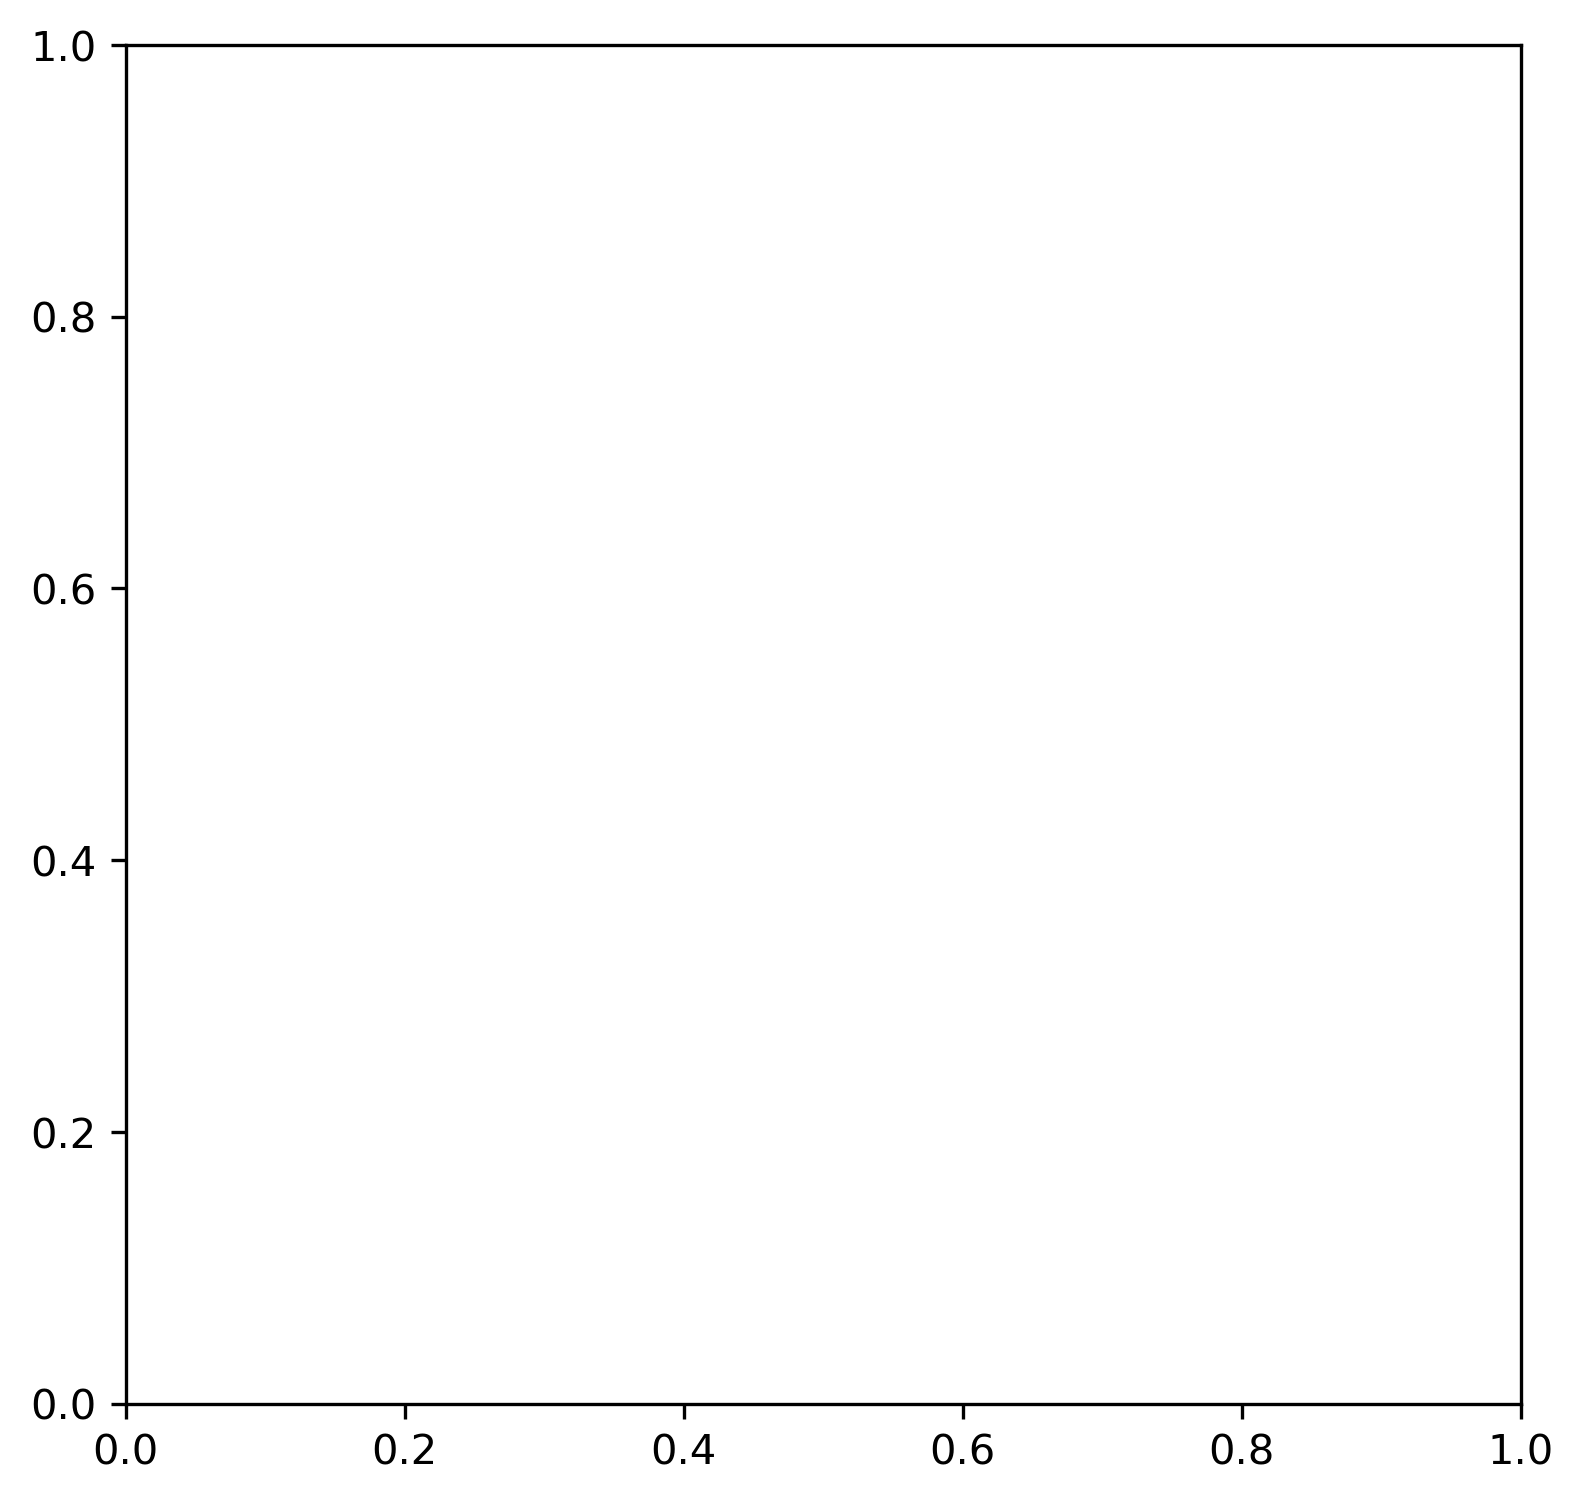

In [195]:
#I am not sure what I did wrong here. Probably a combination of things.

#I think I actually tried to use a plotting method for a different type of decision tree

#I had tried a lot of things and was very frustrated

#Obviously it didn't work

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

forest_1.plot_tree(ClassTree,
           feature_names = train_X.columns, 
           class_names=ClassTree.classes_,
           filled = True,rounded=True);
plt.show()

In [ ]:
#Import Logistic Regression algorithm and accuracy metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [102]:
#I was trying to use the encoding procedure from the decision tree lab, but I did not understand the parameters and it did not work

#Once and a great while, I read my errors and I understand all or parts of them. 

#This is not one of these times. 

from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke','Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt','Severe Crosswind', 'Partly Cloudy'])
X[:,2] = le_weather.transform(X[:,2]) 


le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt','Standing Water', 'Oil'])
X[:,3] = le_ROADCOND.transform(X[:,3])


le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights','Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off','Dark - Unknown Lighting'])
X[:,4] = le_LIGHTCOND.transform(X[:,4]) 

X[0:4]

ValueError: y contains previously unseen labels: 'Daylight'

In [27]:
#I thought this code was supposed to help me choose features and I'm not sure why it didn't work. 

#At the time I ran this, I had created or sliced a dataframe called df_test, so that was not necessarily the issue

#As a side note, I think "Future Warning" is a fantastic band name

X = df_test.loc[:,'SEVERITYCODE']  
y = df_test.loc[:,'UNDERINFL':'WEATHER']   
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[2. 1. 1. ... 2. 2. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Results<a name="results"></a>

Sadly, since none of the methods from any of the previous courses are working for me, I do not have any results to report. I have been working on this all day, every day, for 3 days now. I would be happy to put in more work, but I truly don't know what else to try. I am completely befuddled by the complete absence of instructors in this course. I have gone back into multiple labs, but very little of it is applicable. Maybe my mistake was choosing the shared data set, but I am reluctant to change that after spending so many hours working with it.

## Discussion<a name="discussion"></a>

Let's discuss! If you're available and open to talking about these topics and or forming a study group please email me at mirandacchilds@gmail.com. I would still like to learn these subjects despite having put so much time into this deficient program, all for naught. I will definitely be looking for other programs, people to study with, and hopefully a mentor or two as well.

## Conclusion<a name="conclusion"></a>

I hope that my failure here is somehow helpful for someone. Alternately, if someone has constructive feedback for me, tips, or other resources, I would be really happy to be able to re-visit this code, correct my errors and create a true finish to the course. As it is, I am on the verge of throwing my computer down the stairs.